In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [17]:
# get the data

concrete_dataframe = pd.read_csv("https://raw.githubusercontent.com/alexander-one/portfolio/main/Project%20-%20Concrete%20Strength%20ML/assets/Concrete_Data.csv")

From the ReadMe with the data: 

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [18]:
# make sure it loaded
concrete_dataframe.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
#looking to make sure the datatypes are all non-categorical
concrete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# split the data into train and test
train_set, test_set = train_test_split(concrete_dataframe, test_size = 0.2, random_state = 42)

In [22]:
# data exploration without messing with the original train_set
concrete = train_set.copy()

In [23]:
#Pearson's r
corr_matrix = concrete.corr()

# remove redundancy in the heatmap about to come up
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

<AxesSubplot:>

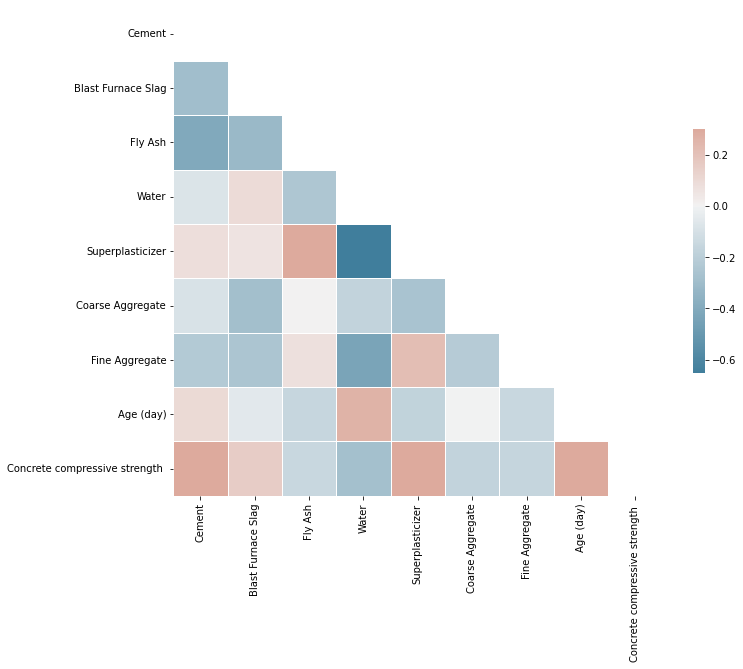

In [24]:
#produce a visual of the correlation between features
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
corr_matrix["Concrete compressive strength "].sort_values(ascending = False)

Concrete compressive strength     1.000000
Cement                            0.496686
Superplasticizer                  0.353292
Age (day)                         0.332074
Blast Furnace Slag                0.155159
Fly Ash                          -0.149749
Fine Aggregate                   -0.158425
Coarse Aggregate                 -0.171612
Water                            -0.284590
Name: Concrete compressive strength , dtype: float64

Let's take superplasticizer, age, water, fine aggregate, and compressive strength and see what the trends are. 

In [29]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Superplasticizer', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Water', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Fine Aggregate', ylabel='Superplasticizer'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Water'>,
        <AxesSubplot:xlabel='Water', ylabel='Water'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Water'>,
        <AxesSubplot:xlabel='Fine Aggregate', ylabel='Water'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Water', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Fine Aggregate', ylabel='Age (day)'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Fine Aggregate'>,
        <AxesSubplot:xlabel='Water', ylabel='Fine Aggregate'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Fine Aggregate'>,
        <Axes

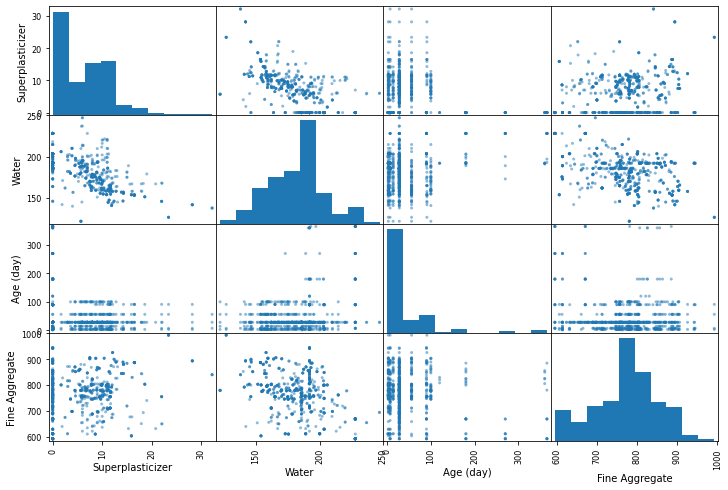

In [31]:
attributes = ["Superplasticizer", "Water", "Age (day)", "Fine Aggregate"]
scatter_matrix(concrete[attributes], figsize = (12,8))